In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [9]:
sentTrain = pd.read_csv('generic_sentiment_dataset_50k.csv')
display(sentTrain.head())
display(sentTrain.shape)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\r\n2. No lag\r\n3. This is m...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


(50000, 3)

In [10]:
sentTest = pd.read_csv('generic_sentiment_dataset_10k.csv')
display(sentTest.head())
display(sentTest.shape)

,sentiment,text,label
0,neutral,Camera good,1
1,negative,OMG! I KNOW! I give myself a stroke everytim...,0
2,neutral,Good,1
3,positive,The company recorded revenues of E658 .1 milli...,2
4,positive,All is good,2


(10000, 3)

In [12]:
sentDF = pd.concat([sentTrain, sentTest], ignore_index = True)
display(sentDF.head())
display(sentDF.shape)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\r\n2. No lag\r\n3. This is m...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


(60000, 3)

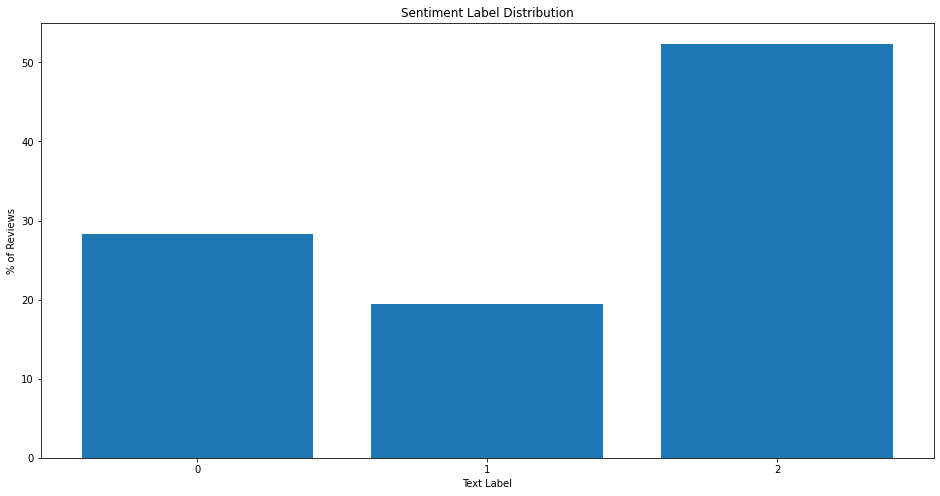

In [13]:
values, counts = np.unique(sentDF['label'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize = (16,8))
plt.bar(values, normalized_counts*100)
plt.xlabel('Text Label')
plt.xticks([0,1,2])
plt.ylabel('% of Reviews')
plt.title("Sentiment Label Distribution")
plt.show()

In [16]:
X = sentDF['text']
y = sentDF['label']
sentWordsVec = CountVectorizer(min_df = 50, stop_words='english')
sentWordsVec.fit(X)
X_Vec = sentWordsVec.transform(X)

Train shape: ((60000, 1931), (60000,))


In [26]:
VecDF = pd.DataFrame(columns = sentWordsVec.get_feature_names(), data = X_Vec.toarray())
VecDF['label'] = y
display(VecDF)

,00,000,10,100,1000,10000,1080p,10k,11,12,...,yes,yesterday,young,youtube,yum,yummy,zero,zoom,zooming,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
check = VecDF.loc[0]
check.where(check > 0, inplace = True)
check.dropna(inplace = True)
print(check)
print()
print(f"Original Text: {sentTrain.iloc[0,1]}")
print(f"Original Label: {sentTrain.iloc[0,2]}")

5000       1.0
battery    1.0
big        1.0
camera     1.0
good       2.0
mah        1.0
mobile     1.0
quality    1.0
label      2.0
Name: 0, dtype: float64

Original Text: good mobile. battery is 5000 mah is very big. camera quality very good.
Original Label: 2


In [56]:
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    return words_df

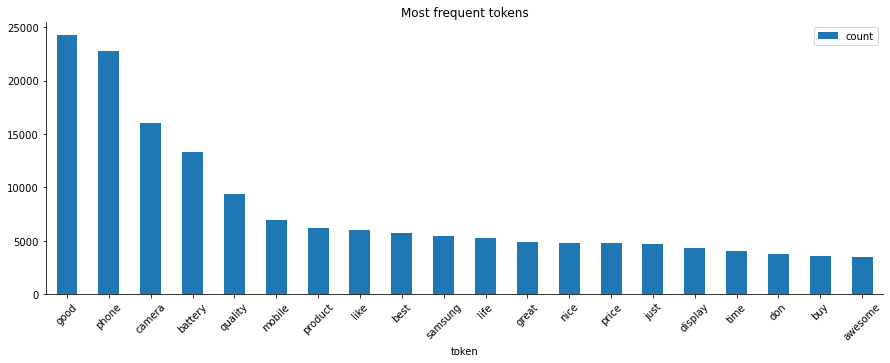

In [57]:
word_counts = X_Vec.toarray().sum(axis=0)
words = sentWordsVec.get_feature_names()

wrodsDF = plot_most_frequent(words, word_counts)

In [59]:
X = VecDF.iloc[:, :-1]
y = VecDF.iloc[:,-1]
print(f"Shapes: {X.shape, y.shape}")

Shapes: ((60000, 1931), (60000,))


In [61]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=12)
print(f"Train Shapes: {X_train.shape, y_train.shape}")
print(f"Val Shapes: {X_val.shape, y_val.shape}")
print(f"Test Shapes: {X_test.shape, y_test.shape}")

Train Shapes: ((40800, 1931), (40800,))
Val Shapes: ((10200, 1931), (10200,))
Test Shapes: ((9000, 1931), (9000,))


In [62]:
%%time
valScores = []
trainScores = []
cVals = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(solver='lbfgs', C = c, random_state = 12)
    my_logreg.fit(X_train, y_train)
    
    trainScores.append(my_logreg.score(X_train, y_train))
    valScores.append(my_logreg.score(X_val, y_val))
    cVals.append(c)

Wall time: 3min 29s


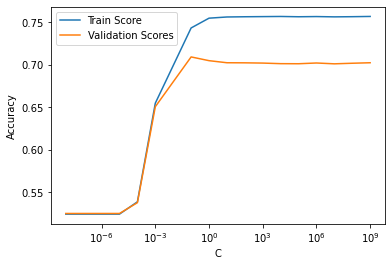

The c-calue with the highest valuation score is 0.1


In [63]:
plt.figure()
plt.plot(C_range, trainScores,label="Train Score")
plt.plot(C_range, valScores,label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-calue with the highest valuation score is {cVals[np.argmax(valScores)]}")

In [64]:
%%time
logit = LogisticRegression(solver='lbfgs', C = 0.1, random_state = 12)

logit.fit(X_train, y_train)

print(f"Logestical Regression Train: {logit.score(X_train, y_train)}")
print(f"Logestical Regression Valuation: {logit.score(X_val, y_val)}")
print(f"Logestical Regression Test: {logit.score(X_test, y_test)}")

Logestical Regression Train: 0.7435049019607843
Logestical Regression Valuation: 0.7093137254901961
Logestical Regression Test: 0.709
Wall time: 16.7 s
